# MIE1512H Project

### Topic: Predicting Station-Level Demand in Bike-Sharing Systems

Name: Tanya Tang<br>
Version: V3<br>
Date: March 27, 2020

___
### Project Overview

The goal of the paper this project is based on is to improve the effectiveness of station-level rebalancing activites within bike-sharing systems by obtaining more accurate minimum inventory levels per station. 

The authors used historical bike trip data along with hourly weather data to train several machine learning models. The model features fell within two categories, time-related features from the bike data (i.e. year, month, etc.) and weather-related features (i.e. precipitation, temperature, etc.). To reduce overfitting, the data is first transformed onto a reduced space using four different reduction techniques:
1. No reduction, baseline
2. Group all stations into one cluster
3. Kmeans - cluster stations into k clusters
4. Singular value decomposition

After reducing the problem, four different prediction methods were tested:
1. Linear regression
2. Multi-layer perceptron
3. Gradient boosted tree
4. Random forest

Once a prediction was made on the reduced problem, the reduction needed to be inverted to obtain the full problem predictions. Each reduction technique has its own specific inversion process. 

The solution techniques were tested and scored based on the performance of its generated minimum station inventory levels. 

In this project, a similar methodology will be followed, with modifications and additions on the feature construction aspect. Focusing on the city of San Francisco, historical bike data and weather data will be used in conjunction with crime data. Features from all three data sets will be constructed, and several prediction techniques will be tested. As will be further explained in later sections, the reduction/inversion step was omitted from this project due to its more theoretical nature. Thus, we tested three of the four prediction methods from the paper, linear regression, gradient-boosted tree, and random forest. As per feedback from V1, before working on the full dataset, this notebook first applies the three prediction methods we tested to the toy dataset prepared from V1. Then, we will prepare the full dataset in the same manner as V1 and test the three prediction models. After the modeling is complete, we will create dynamic inventory models and test against a constant inventory model. This will conclude the project and we can see if the dynamic model is better. 

___
### Project Versions/Timelines

#### V1

CRISP-DM Tasks:
* Data Understanding (collecting, describing, exploring, verifying)
* Data Preparation on Test Scale (selecting, cleaning, constructing, integrating, formatting)

Actual Timeline:
* Looking up potential datasets and collecting from online sources/deciding which datasets to use (0.5 hr)
* Exploring entries/schema of each chosen dataset to understand discrepancies and connections between datasets (1 hr)
* Loading/cleaning raw data within each dataset, taking a closer look at which entries are relevant (2 hr)
* Calculating connections between different datasets and joining tables to eventually form a single aggregated table containing all relevant information for a single entry (4 hrs)
* Verifying data preparation steps (i.e. tables joined correctly, entries were not lost throughout the preparation process, no null values exist) (1 hr)

#### V2

CRISP-DM Tasks:
* Data Preparation on Full Scale (selecting, cleaning, constructing, integrating, formatting)
* Modeling (selecting techniques, generating test design, building, assessing)

Planned Timeline:
* Recreate data preparation tasks from V1 on full dataset (1 hr)
* Research reduction/prediction techniques and how to apply them using python packages (1 hr)
* *Implement reduction techniques (4 hr) (did not complete)*
* Implement regression techniques (4 hr)
* *Implement inversion techniques (4 hr) (did not complete)*
* Test implemented models (1 hr)

Actual Timeline:
* Research prediction techniques and how to apply them using python package (0.5 hr)
* Apply ML models to dataset prepared in V1 (should have been included in V1) (3 hr)
* Recreate data preparation tasks from V1 on full dataset (2 hr)
* Implement regression techniques (3 hr)
* Apply implemented models to test data to make predictions (4 hr)
    * NOTE: Linear regression on all stations takes ~10 min to complete, gradient-boosted tree on all stations takes ~1 hr to complete, random forest on all stations takes ~30 min to complete

#### V3

CRISP-DM Tasks:
* Modeling (assessing)
* Evaluation (evaluting results, reviewing process, determining next steps)

Planned Timeline:
* *Transform predictions into inventory model for test data time range (4 hr) (did not complete)*
* Create visualizations and compare performance between models (3 hr)
* Review project activites to verify correctness (1 hr)
* Summarize project and list some potential next steps (1 hr)

Actual Timeline:
* Create visualizations and compare performance between models (2 hr)
* Review project activities to verify correctness/summarize project and list some potential next steps (1 hr)

#### F

Planned Timeline:
* Write report (6 hr)

Actual Timeline:
* Write report (6 hr)

___
### Modeling

#### Linear Regression
* The linear regression model will be chosen from 6 different models via cross validations, the three regularization parameters are chosen from $(0.3, 0,5, 0.7)$ and the two elastic net parameters are chosen from $(0.5, 0.8)$
* These parameters were selected by taking the default value given by spark, and slightly varying that value
* The models will be evaluated by the built in RegressionEvaluator class in spark, giving an $R^2$ value

#### Gradient-Boosted Tree
* The gradient-boosted tree model will be chosen from 2 different models via cross validations, the two maximum depth parameters are chosen from $(3, 5)$
* These parameters were selected by taking the value from the paper (5) and giving a lower parameter option as we have not applied any reduction methods so our model is more prone to overfitting
* The models will be evaluated by the built in RegressionEvaluator class in spark, giving an $R^2$ value

#### Random Forest
* The random forest model will be chosen from 2 different models via cross validations, the two forest size (number of trees) parameters are chosen from $(50, 100)$
* These parameters were selected by taking the value from the paper (100), and giving a lower parameter option as we have not applied any reduction methods so our model is more prone to overgitting
* The models will be evaluated by the built in RegressionEvaluator class in spark, giving an $R^2$ value

___
### Evaluation

To evaluate the prediction models we created, we need to generate and test inventory intervals based on those models. The paper fits a Poisson distribution to the station data then calculates the inventory intervals using several equations. This extra step is very theoretical and the equations are quite complex, involving integrals and probability distributions. Thus, I will not be completing this step for this project. Instead, I will focus on creating visualizations to compare results between the three prediction models. 

First, let's load all of the appropriate data generated from V2 and check that each prediction model has results for the same stations. 

In [1]:
import os

In [2]:
# Add Java locations
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-1.8.0-openjdk-amd64"
os.environ["JRE_HOME"] = "/usr/lib/jvm/java-1.8.0-openjdk-amd64/jre"

# Initialize spark
import findspark
findspark.init("/opt/spark")
import pyspark
spark = pyspark.sql.SparkSession.builder.appName("appName").getOrCreate()

In [3]:
def find_string(key, files):
    return list(filter(lambda x: key in x, files))[0]

In [32]:
# import station names and check that all models have same station results
gbtr_depart_rootdir = '/home/tanya/Documents/Code/python/bike_share_rebalancing/resources/gbtr/departure'
station_names = [r for _, r, _ in os.walk(gbtr_depart_rootdir)]
station_names = station_names[0]
gbtr_arrival_rootdir = '/home/tanya/Documents/Code/python/bike_share_rebalancing/resources/gbtr/arrival'
print(sorted(station_names) == sorted([r for _, r, _ in os.walk(gbtr_arrival_rootdir)][0]))
rfr_depart_rootdir = '/home/tanya/Documents/Code/python/bike_share_rebalancing/resources/rfr/departure'
print(sorted(station_names) == sorted([r for _, r, _ in os.walk(rfr_depart_rootdir)][0]))
rfr_arrival_rootdir = '/home/tanya/Documents/Code/python/bike_share_rebalancing/resources/rfr/arrival'
print(sorted(station_names) == sorted([r for _, r, _ in os.walk(rfr_arrival_rootdir)][0]))
lr_depart_rootdir = '/home/tanya/Documents/Code/python/bike_share_rebalancing/resources/lr/departure'
print(sorted(station_names) == sorted([r for _, r, _ in os.walk(lr_depart_rootdir)][0]))
lr_arrival_rootdir = '/home/tanya/Documents/Code/python/bike_share_rebalancing/resources/lr/arrival'
print(sorted(station_names) == sorted([r for _, r, _ in os.walk(lr_arrival_rootdir)][0]))
data = {i:{} for i in station_names}

# import filepaths and add to data object
gbtr_depart_parquet_files = list(filter(lambda x: x[-4:] == 'json', [os.path.join(r, n) for r, _, f in os.walk(gbtr_depart_rootdir) for n in f]))
gbtr_arrival_parquet_files = list(filter(lambda x: x[-4:] == 'json', [os.path.join(r, n) for r, _, f in os.walk(gbtr_arrival_rootdir) for n in f]))
rfr_depart_parquet_files = list(filter(lambda x: x[-4:] == 'json', [os.path.join(r, n) for r, _, f in os.walk(rfr_depart_rootdir) for n in f]))
rfr_arrival_parquet_files = list(filter(lambda x: x[-4:] == 'json', [os.path.join(r, n) for r, _, f in os.walk(rfr_arrival_rootdir) for n in f]))
lr_depart_parquet_files = list(filter(lambda x: x[-4:] == 'json', [os.path.join(r, n) for r, _, f in os.walk(lr_depart_rootdir) for n in f]))
lr_arrival_parquet_files = list(filter(lambda x: x[-4:] == 'json', [os.path.join(r, n) for r, _, f in os.walk(lr_arrival_rootdir) for n in f]))
for name in station_names:
    data[name]['gbtr_depart'] = find_string(name, gbtr_depart_parquet_files)
    data[name]['gbtr_arrival'] = find_string(name, gbtr_arrival_parquet_files)
    data[name]['rfr_depart'] = find_string(name, rfr_depart_parquet_files)
    data[name]['rfr_arrival'] = find_string(name, rfr_arrival_parquet_files)
    data[name]['lr_depart'] = find_string(name, lr_depart_parquet_files)
    data[name]['lr_arrival'] = find_string(name, lr_arrival_parquet_files)

True
True
True
True
True


Now we need to read in the json files to spark. 

In [34]:
for name in data.keys():
    data[name]['gbtr_depart'] = spark.read.json(data[name]['gbtr_depart'])
    data[name]['gbtr_arrival'] = spark.read.json(data[name]['gbtr_arrival'])
    data[name]['rfr_depart'] = spark.read.json(data[name]['rfr_depart'])
    data[name]['rfr_arrival'] = spark.read.json(data[name]['rfr_arrival'])
    data[name]['lr_depart'] = spark.read.json(data[name]['lr_depart'])
    data[name]['lr_arrival'] = spark.read.json(data[name]['lr_arrival'])
    print('.', end='')

.....................................................................................................................................................................................................................................................................................................................................................

First, we can compare the the R^2 values calculated in V2 using the validation data. 

In [67]:
validations = '/home/tanya/Documents/Code/python/bike_share_rebalancing/resources/validations'
files = [f for _, _, f in os.walk(validations)][0]
files = list(filter(lambda x: 'txt' in x, files))
all_R2 = {i: 0 for i in list(map(lambda x: x.replace('_validation.txt', ''), files))}
for file in files:
    read = open(f'{validations}/{file}', 'r')
    R2 = []
    for line in read:
        fields = line.split(' ')
        R2.append(float(fields[-1][0:-2]))
    all_R2[file.replace('_validation.txt', '')] = np.mean(R2)

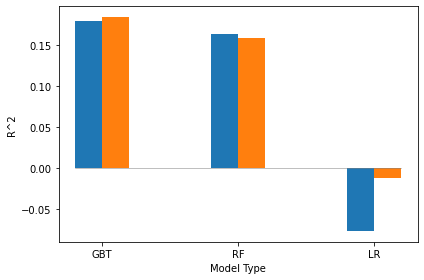

In [80]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = [1, 2, 3]
width = 0.2
y1 = [all_R2['departure_gradient_boosted_forest'],
      all_R2['departure_random_forest'],
      all_R2['departure_linear_regression']]
y2 = [all_R2['arrival_gradient_boosted_forest'],
      all_R2['arrival_random_forest'],
      all_R2['arrival_linear_regression']]
ax.bar([i - width / 2 for i in x], y1, width, label='departures')
ax.bar([i + width / 2 for i in x], y2, width, label='arrivals')
ax.plot([0.8, 3.2], [0, 0], color='grey', linewidth=0.5)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['GBT', 'RF', 'LR'])
ax.set_xlabel('Model Type')
ax.set_ylabel('R^2')
fig.tight_layout()
plt.show()

We can see that none of the models are doing particularly well. This may be due to an unbalanced distribution of data samples across stations. 

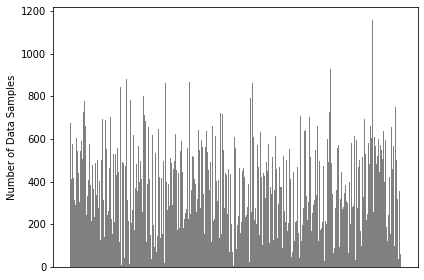

In [104]:
fig, ax = plt.subplots()
x = np.arange(0, len(data))
width = 1
for i, name in enumerate(data.keys()):
    ax.bar(x[i], data[name]['gbtr_depart'].count(), width, color='grey')
ax.set_ylabel('Number of Data Samples')
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
fig.tight_layout()
plt.show()

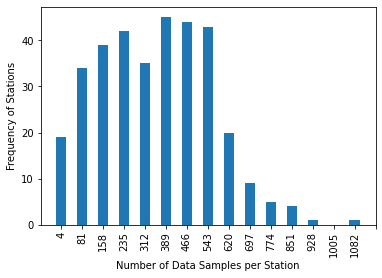

In [105]:
hist_values = [data[name]['gbtr_depart'].count() for name in data.keys()]
fig, ax = plt.subplots()
hist, bin_edges = np.histogram(hist_values, bins=15)
bin_edges = [int(i) for i in bin_edges]
ax.bar(np.arange(0, len(bin_edges) - 1), hist, width=0.5)
ax.set_xticks(np.arange(0, len(bin_edges)))
ax.set_xticklabels(bin_edges[0:-1], rotation='vertical')
ax.set_xlabel('Number of Data Samples per Station')
ax.set_ylabel('Frequency of Stations')
plt.show()

We can clearly see that there is obviously too much variation in the distribution of data samples across the station. This shows that there is a minor subset of popular stations within this bike share system. Thus, it might be best if efforts were only focused on developing robust models for the popular stations and using a constant inventory model for the less popular stations. Next, let us plot a more granular graph showing the discrepancy between predicted and actual departure/arrival counts for each model type. 

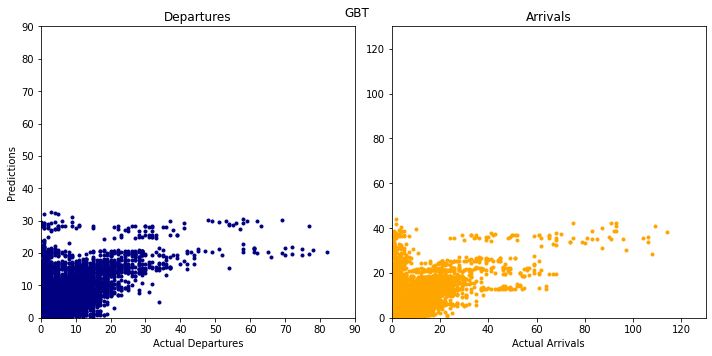

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('Departures')
ax[1].set_title('Arrivals')
for name in data.keys():
    actual_d = [x.departure_count for x in data[name]['gbtr_depart'].select('departure_count').collect()]
    pred_d = [x.prediction for x in data[name]['gbtr_depart'].select('prediction').collect()]
    actual_a = [x.arrival_count for x in data[name]['gbtr_arrival'].select('arrival_count').collect()]
    pred_a = [x.prediction for x in data[name]['gbtr_arrival'].select('prediction').collect()]
    ax[0].scatter(actual_d, pred_d, color='navy', marker='.')
    ax[1].scatter(actual_a, pred_a, color='orange', marker='.')
ax[0].set_xlabel('Actual Departures')
ax[0].set_ylabel('Predictions')
ax[0].set_xlim(0, 90)
ax[0].set_ylim(0, 90)
ax[1].set_xlabel('Actual Arrivals')
ax[1].set_xlim(0, 130)
ax[1].set_ylim(0, 130)
fig.suptitle('GBT')
fig.tight_layout()
plt.show()

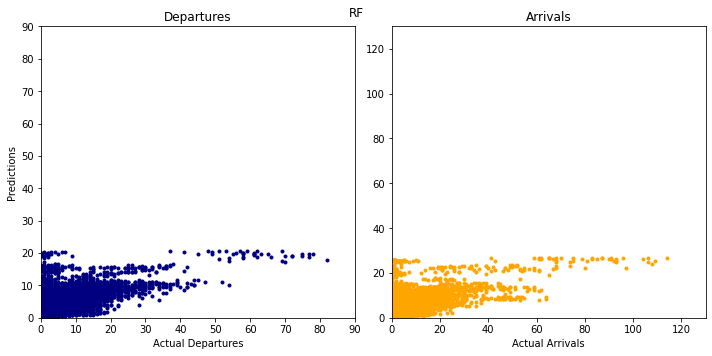

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('Departures')
ax[1].set_title('Arrivals')
for name in data.keys():
    actual_d = [x.departure_count for x in data[name]['rfr_depart'].select('departure_count').collect()]
    pred_d = [x.prediction for x in data[name]['rfr_depart'].select('prediction').collect()]
    actual_a = [x.arrival_count for x in data[name]['rfr_arrival'].select('arrival_count').collect()]
    pred_a = [x.prediction for x in data[name]['rfr_arrival'].select('prediction').collect()]
    ax[0].scatter(actual_d, pred_d, color='navy', marker='.')
    ax[1].scatter(actual_a, pred_a, color='orange', marker='.')
ax[0].set_xlabel('Actual Departures')
ax[0].set_ylabel('Predictions')
ax[0].set_xlim(0, 90)
ax[0].set_ylim(0, 90)
ax[1].set_xlabel('Actual Arrivals')
ax[1].set_xlim(0, 130)
ax[1].set_ylim(0, 130)
fig.suptitle('RF')
fig.tight_layout()
plt.show()

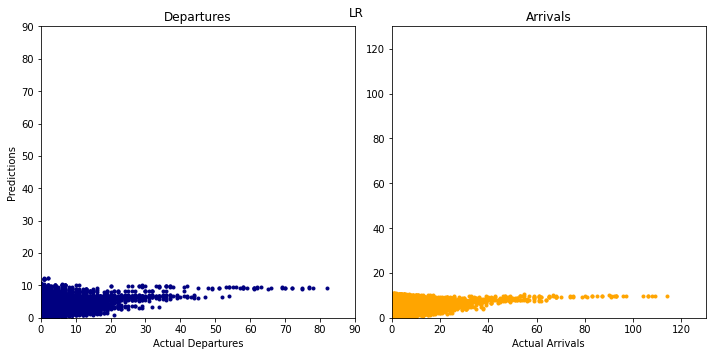

In [133]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('Departures')
ax[1].set_title('Arrivals')
for name in data.keys():
    actual_d = [x.departure_count for x in data[name]['lr_depart'].select('departure_count').collect()]
    pred_d = [x.prediction for x in data[name]['lr_depart'].select('prediction').collect()]
    actual_a = [x.arrival_count for x in data[name]['lr_arrival'].select('arrival_count').collect()]
    pred_a = [x.prediction for x in data[name]['lr_arrival'].select('prediction').collect()]
    ax[0].scatter(actual_d, pred_d, color='navy', marker='.')
    ax[1].scatter(actual_a, pred_a, color='orange', marker='.')
ax[0].set_xlabel('Actual Departures')
ax[0].set_ylabel('Predictions')
ax[0].set_xlim(0, 90)
ax[0].set_ylim(0, 90)
ax[1].set_xlabel('Actual Arrivals')
ax[1].set_xlim(0, 130)
ax[1].set_ylim(0, 130)
fig.suptitle('LR')
fig.tight_layout()
plt.show()

These graphs show that the prediction models are severely underestimating both departure and arrival counts. Overall, we can see that GBT is clearly the best out of the three prediction models tested. However, the method of applying the same prediction model to all stations regardless of station popularity is clearly not the best technique. 

___
### Future Steps

There is clearly a vast room for improvement in this project. The reduction step from the paper was skipped completely, perhaps adding reduction back into the model is crucial to improving model accuracy. In addition, generating inventory intervals was also skipped, and thus the model from this project was not able to be compared to a constant inventory model. There is also future work that can be done in better utilizing the provided data. For instance, we can see that in this particular bike share system in San Francisco, the majority of stations have under 500 data points. Perhaps this type of modelling can only be completed in cities where bike sharing is so popular that most stations have rental and return trips most hours of the day. Or, in cities where bike sharing is not very popular, perhaps a hybrid model can be developed where prediction models are trained for popular systems, but constant inventory models are used for less popular systems to prevent the use of inaccurate prediction models. 

___
### Bibliography

\[1\] P. Hulot, D. Aloise, and S.D. Jena, "Towards Station-Level Demand Prediction for Effective Rebalancing in Bike-Sharing Systems," In KDD'18: Proceedings of the 24th ACM SIGKDD International Conference on Knowledge Discover \& Data Mining, 2018, pp. 378-386. 